Visualizing our Simulations
========================

Each time we run our Maestro study, we add 10 new runs of the ball bouncing simulation to our datastore. Now let's take a look at those results...

In [14]:
from numbers import Number
from collections import defaultdict

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

import sina.datastores.sql as sina_sql
import sina.utils
from sina.datastore import create_datastore
from sina.visualization import Visualizer
import math

%matplotlib notebook

# Initialization
database = 'baseline/baseline_output.sqlite'
target_type = "csv_rec"
datastore = create_datastore(database)
recs = datastore.records
vis = Visualizer(datastore)
print("Sina is ready!")


def RMSE(x_true, x_pred):
    summation = 0
    for xt, xp in zip(x_true,x_pred):
        summation += (xt-xp)**2
    mean = summation/len(x_true)
    rmse = math.sqrt(mean)
    return rmse

def diff(x_true, x_pred):
    dif = []
    for xt, xp in zip(x_true,x_pred):
        dif.append(xt-xp)
    return dif
        
        
val = recs.get('47bcda_0')
print(val.data.keys()) # since there are no embedded keys we can just use this
#print(val.curve_sets) # no curve sets



x_true = val.data['x_pos']['value']
y_true = val.data['y_pos']['value']
z_true = val.data['z_pos']['value']
time = val.data['time']['value']

for rec in recs.get_all():
    x_pred = rec.data['x_pos']['value']
    y_pred = rec.data['y_pos']['value']
    z_pred = rec.data['z_pos']['value']
    
    x_diff = diff(x_true, x_pred)
    x_rmse = RMSE(x_true, x_pred)
    y_diff = diff(y_true, y_pred)
    y_rmse = RMSE(y_true, y_pred)
    z_diff = diff(z_true, z_pred)
    z_rmse = RMSE(z_true, z_pred)
    
    print(x_rmse)
    print(y_rmse)
    print(z_rmse)
    
    rec.add_data('x_rmse',x_rmse)
    rec.add_data('x_diff',x_diff)
    rec.add_data('y_rmse',y_rmse)
    rec.add_data('y_diff',y_diff)
    rec.add_data('z_rmse',z_rmse)
    rec.add_data('z_diff',z_diff)
    
    recs.update(rec) # need to update or else won't save!!!!!


Sina is ready!
dict_keys(['x_pos_initial', 'y_pos_initial', 'z_pos_initial', 'x_vel_initial', 'y_vel_initial', 'z_vel_initial', 'gravity', 'box_side_length', 'group_id', 'time', 'x_pos', 'y_pos', 'z_pos', 'x_vel_final', 'y_vel_final', 'z_vel_final', 'num_bounces'])
0.0
0.0
0.0
1.572025592634765
0.11319360257227601
2.3047465734670505
4.121021966846573
0.02572822247995446
1.4208254133784288
0.19772673369471488
0.11232115336574376
1.430031261314339


In [15]:
header = 1
for rec in recs.get_all():
    
    if header == 1:
        print('| rec.id | x_pos_initial | y_pos_initial | z_pos_initial | x_vel_initial | y_vel_initial | z_vel_initial |')
        print('| --- | --- | --- | --- | --- | --- | --- |')
        header = 0
    print('|',rec.id,
          '|',rec.data['x_pos_initial']['value'],
          '|',rec.data['y_pos_initial']['value'],
          '|',rec.data['z_pos_initial']['value'],
          '|',rec.data['x_vel_initial']['value'],
          '|',rec.data['y_vel_initial']['value'],
          '|',rec.data['z_vel_initial']['value'],
          '|'
          )

| rec.id | x_pos_initial | y_pos_initial | z_pos_initial | x_vel_initial | y_vel_initial | z_vel_initial |
| --- | --- | --- | --- | --- | --- | --- |
| 47bcda_0 | 49.37 | 48.71 | 51.25 | 5.22 | 4.83 | 5.13 |
| 47bcda_1 | 50.0 | 50.0 | 50.0 | 5.0 | 5.0 | 5.0 |
| 47bcda_2 | 51.0 | 49.0 | 50.0 | 5.5 | 4.9 | 5.1 |
| 47bcda_3 | 49.0 | 50.0 | 51.0 | 5.25 | 4.9 | 5.0 |


Sanity Check: are our runs randomized?
========

We want to make sure our starting positions are properly randomized. There should be a variety of values in this graph.

<IPython.core.display.Javascript object>


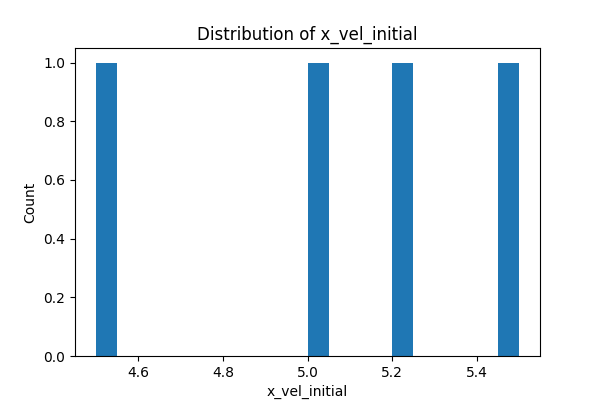

Dropdown(description='x data name:', index=6, options=('box_side_length', 'gravity', 'group_id', 'num_bounces'…

In [104]:
_ = vis.create_histogram("x_vel_initial", interactive=True)

Simple hypothesis testing
===============

Could there be a relationship between having a high initial velocity and a high number of bounces?

<IPython.core.display.Javascript object>


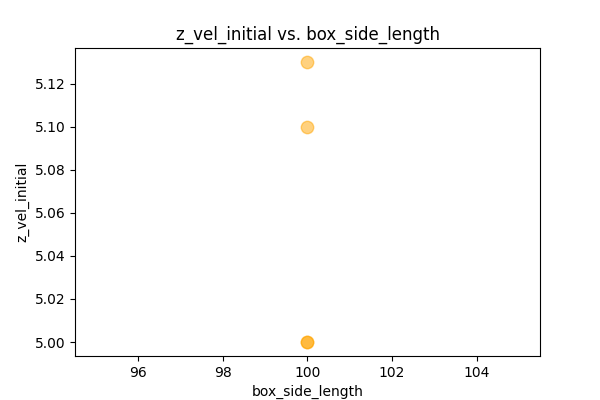

Dropdown(description='x data name:', index=8, options=('box_side_length', 'gravity', 'num_bounces', 'x_pos_ini…

Dropdown(description='y data name:', index=2, options=('box_side_length', 'gravity', 'num_bounces', 'x_pos_ini…

In [103]:
_ = vis.create_scatter_plot("y_vel_initial", "num_bounces", interactive=True, matplotlib_options={"color": "orange", "alpha": 0.5, "s": 80})

Actually watching a ball bounce
===========================

Since we're collecting position at each step, we can easily visualize how the ball bounching actually works...we'll select the ball with the high number of bounces for interest.

<IPython.core.display.Javascript object>


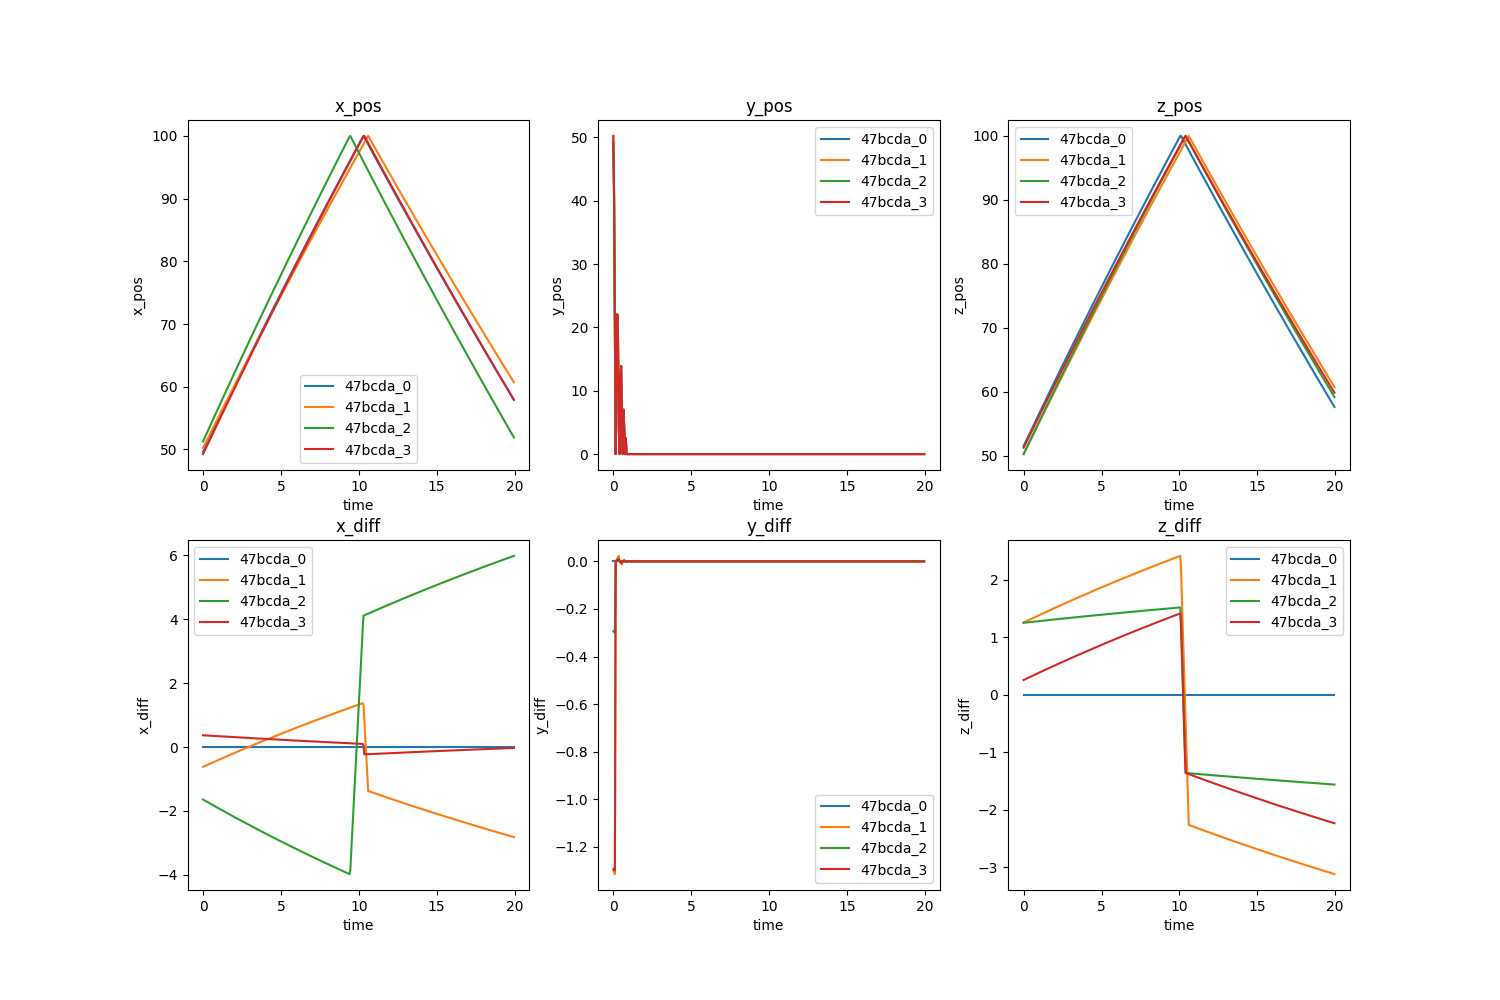

In [16]:
id_pool = list(recs.find_with_max("num_bounces", 1, ids_only=True))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


_ = vis.create_line_plot(fig=fig, ax=ax[0,0],x="time", y="x_pos", title = "{y_name}")
_ = vis.create_line_plot(fig=fig, ax=ax[0,1],x="time", y="y_pos", title = "{y_name}")
_ = vis.create_line_plot(fig=fig, ax=ax[0,2],x="time", y="z_pos", title = "{y_name}")

_ = vis.create_line_plot(fig=fig, ax=ax[1,0],x="time", y="x_diff", title = "{y_name}")
_ = vis.create_line_plot(fig=fig, ax=ax[1,1],x="time", y="y_diff", title = "{y_name}")
_ = vis.create_line_plot(fig=fig, ax=ax[1,2],x="time", y="z_diff", title = "{y_name}")

fig.savefig("baseline/images/QoIs.png")

<IPython.core.display.Javascript object>


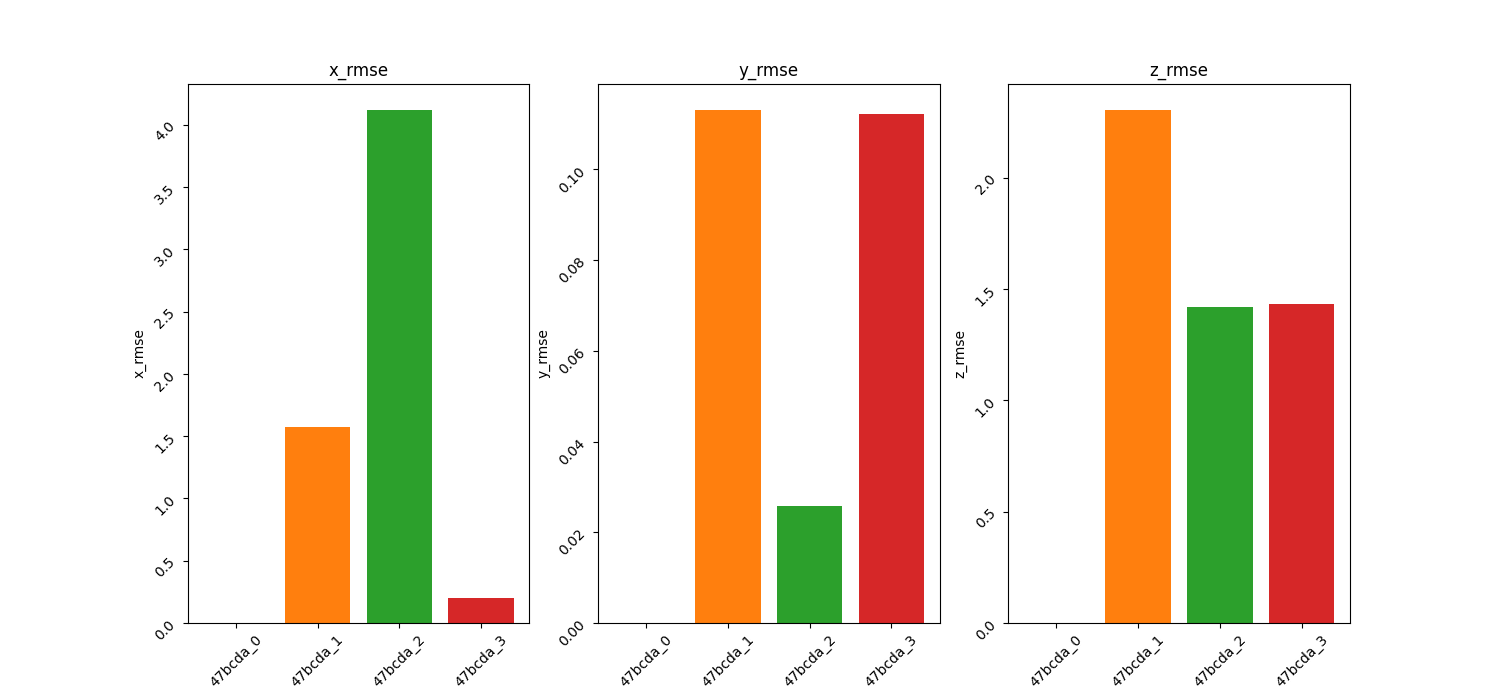

| rec.id | x_rmse | y_rmse | z_rmse | Mean RMSE |
| --- | --- | --- | --- | --- |
| 47bcda_0 | 0.0 | 0.0 | 0.0 | 0.0 |
| 47bcda_1 | 1.57 | 0.11 | 2.3 | 1.33 |
| 47bcda_2 | 4.12 | 0.03 | 1.42 | 1.86 |
| 47bcda_3 | 0.2 | 0.11 | 1.43 | 0.58 |


In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

header=1
for rec in recs.get_all():
    ax[0].bar(x=rec.id,height=rec.data['x_rmse']['value'])
    ax[1].bar(x=rec.id,height=rec.data['y_rmse']['value'])
    ax[2].bar(x=rec.id,height=rec.data['z_rmse']['value'])
    
    if header == 1:
        print('| rec.id | x_rmse | y_rmse | z_rmse | Mean RMSE |')
        print('| --- | --- | --- | --- | --- |')
        header = 0
    print('|',rec.id,
          '|',round(rec.data['x_rmse']['value'],2),
          '|',round(rec.data['y_rmse']['value'],2),
          '|',round(rec.data['z_rmse']['value'],2),
          '|',round((rec.data['x_rmse']['value']+rec.data['y_rmse']['value']+rec.data['z_rmse']['value'])/3,2),
          '|'
          )

ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)
ax[2].tick_params(rotation=45)

ax[0].set_title('x_rmse')
ax[1].set_title('y_rmse')
ax[2].set_title('z_rmse')

ax[0].set_ylabel('x_rmse')
ax[1].set_ylabel('y_rmse')
ax[2].set_ylabel('z_rmse')

fig.savefig("baseline/images/RMSE.png")

Scaling Up
==========

Each run within a set shares a few starting conditions, but differs in several others. Let's see a whole set together in 3D space to compare their performances. First, let's see what groups we have available.

In [29]:
groups = set(x["group_id"]["value"] for x in recs.get_data(["group_id"]).values())
print("Found the following groups: {}".format(groups))

Found the following groups: {'47bcda'}


Pick whichever you like, set `GROUP_OF_INTEREST` equal to it, and watch the "fireworks"!

This 3D plot isn't (yet) a formal part of Sina, but it's simple enough.

<IPython.core.display.Javascript object>


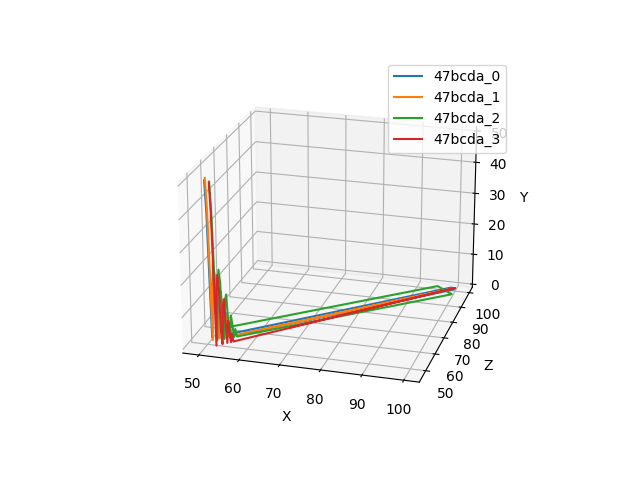

In [30]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

GROUP_OF_INTEREST = "47bcda"
id_pool = list(recs.find_with_data(group_id=GROUP_OF_INTEREST))

ball_set_fig = plt.figure()
ball_set_ax = plt.axes(projection='3d')

for rec_id in id_pool:
    rec = recs.get(rec_id)
    # Some slight weirdness due to 3D axis labeling...simulation thinks of y as up-down
    ball_set_ax.plot3D(rec.data["x_pos"]["value"],
                       rec.data["z_pos"]["value"],
                       rec.data["y_pos"]["value"],
                       label=rec_id)
    ball_set_ax.set_xlabel('X')
    ball_set_ax.set_zlabel('Y')
    ball_set_ax.set_ylabel('Z')
_ = ball_set_ax.legend()

Close Curve Analysis with PyDV
=========================

While Sina allows you to survey large numbers of runs at once, it doesn't include many operations on individual curves. PyDV works directly with Sina, though, opening the door to some extremely powerful manipulations. Here, we'll perform a fourier transform to see the frequency spectrum of the ball bouncing.

TODO:
- change fourier transform out psuedocode mode
- add time

In [ ]:
Close Curve Analysis with PyDV
=========================

While Sina allows you to survey large numbers of runs at once, it doesn't include many operations on individual curves. PyDV works directly with Sina, though, opening the door to some extremely powerful manipulations. Here, we'll perform a fourier transform to see the frequency spectrum of the ball bouncing.

TODO:
- change fourier transform out psuedocode mode
- add time

# Note: pydv's big! Importing it may take a moment.
from pydv import pydvpy as pydv
import io
import json

# PyDV operates on files. We'll dump one of Sina's records to a file
PYDV_DEMO_FILENAME = "pydv_demo_sina.json"
with open(PYDV_DEMO_FILENAME, 'w') as f:
    json.dump(recs.get("bdbe96_4").raw, f)
curves = pydv.readsina(PYDV_DEMO_FILENAME)  # raw?
print(curves)
curve = curves.create_curve(x="time", y="y_pos")
plt.plot(pydv.fft(curve))